In [4]:
from sqlalchemy import URL, create_engine
import pandas as pd

In [5]:
MYSQL_DRIVER = "mysql+mysqlconnector"
MYSQL_USERNAME = "root"
MYSQL_PASSWORD = "XXXXXXXXXXX"
MYSQL_HOST_NAME = "localhost"
MYSQL_PORT = 3306
DB_NAME = "digitalacquisitiondb"


url_object = URL.create(
    MYSQL_DRIVER,
    username=MYSQL_USERNAME,
    password=MYSQL_PASSWORD,
    host=MYSQL_HOST_NAME,
    port=MYSQL_PORT,
    database=DB_NAME,
)

engine = create_engine(url_object)

In [6]:
with engine.connect() as conn:
    vendorinformations = pd.read_sql("SELECT * FROM vendorinformation", conn, parse_dates=["created_at"])
    cities = pd.read_sql("SELECT * FROM city", conn)


vendorinformations_with_city_name = vendorinformations.merge(right=cities, how='inner', left_on='city_id', right_on='id')
sum_requests_per_city = vendorinformations_with_city_name.groupby('name')['name'].count().reset_index(name='counts')

sum_requests_per_city.sort_values(by='counts', ascending=False)

,name,counts
42,Tehran,11
20,Kahrizak,10
25,MeshkinDasht,4
43,Varamin,3
40,Shiraz,3
39,Shemshak,3
37,Shahriar,3
29,NewHashtgerd,3
17,Ishtehard,2
36,Shahidshahr,2


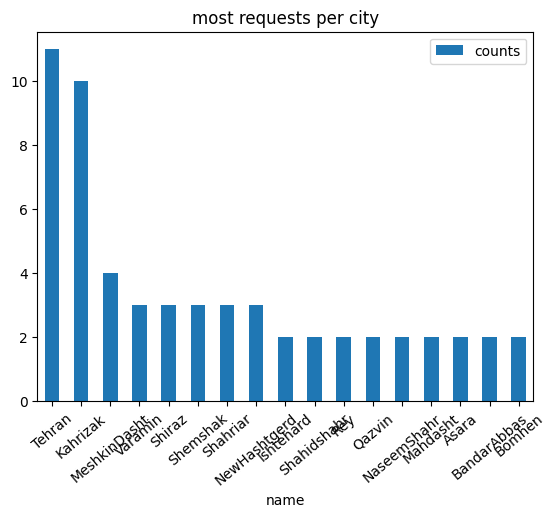

In [7]:
sum_requests_per_city.sort_values(by=['counts'], ascending=False, inplace=True)
sum_requests_per_city[sum_requests_per_city['counts']>1].plot.bar(x='name', title='most requests per city', rot=40, y='counts');